# Preprocessing

In [ ]:
# """"""""""Contributors: Maria Mahbub and Tasmia Rahman 
#                         University of Tennesse, Knoxville""""""""""


import pandas as pd
import numpy as np

#create dataframe of main dataset
df_parking = pd.read_csv('dataset_parking.csv')
df_parking = pd.DataFrame(dataset_parking)

#create dataframe of fine amount
df_codes = pd.read_csv('CodeViolation.csv')
df_codes = pd.DataFrame(dataset_codes)

#create a new column header in the main dataset
df_parking['fine amount'] = ""

#drop irrelevant attributes
df_parking = df_parking.drop(['Plate ID', 'Registration State','Issue Date','Issuing Agency','Street Code1','Street Code2', 'Street Code3', 'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct', 'Issuer Precinct', 'Issuer Code', 
                              'Issuer Command', 'Issuer Squad', 'Time First Observed', 'Violation County', 'Violation In Front Of Or Opposite', 'House Number', 'Intersecting Street', 'Date First Observed', 'Law Section', 'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ', 'From Hours In Effect','To Hours In Effect',
                              'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number', 'Feet From Curb', 'Violation Post Code', 'Violation Description', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation'], axis = 1)

#adding a column with fine amount to main dataset
def add_fine():
    for i, row in df_parking.iterrows():
        parking_codes = row['Violation Code']
        print(parking_codes)
        
        mr = df_codes.loc[df_codes['CODE'].isin([str(parking_codes)])]
        if mr.empty:
            print("empty")
        else:
            fine = mr['All Other Areas'].values[0]
            
            df_parking.loc[i, 'fine amount'] = fine
    

#converting given times to 5 timeframes
def convert24(str1): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if str1[-1:] == "A" and str1[:2] == "12": 
        return "00" + str1[2:-2] 
          
    # remove the AM     
    elif str1[-1:] == "A": 
        return str1[:-1] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif str1[-1:] == "P" and str1[:2] == "12":
        return "12" + str1[2:-1] 
          
    else: 
          
        # add 12 to hours and remove PM 

        return str(int(str1[:2]) + 12) + str1[2:4]
    
    
def daytime_conversion (df1,timelist, replace):        
    c = list(set(list(df1.Violation_Time))&set(timelist))       
    for x in c:
        df1.replace({x: replace},inplace=True)
    return df1
    
    
def convert_timesplit():
    global df_parking
    t1 = []
    time_list = df_parking['Violation Time'].tolist()
    for t in time_list:
        t1.append(convert24(t))
    # print (t1)

    s = [int(x) for x in t1]
    # print (s)
    
    mor = [x for x in range (500,1200)]
    noon = [x for x in range (1200, 1400)]
    afternoon = [x for x in range (1400, 1700)]
    eve = [x for x in range (1700, 2000)]
    n1 = [x for x in range (2000, 2400)]
    n2 = [x for x in range (0, 500)]
    night = n1+n2
    
    df1 = pd.DataFrame (s)
    df1.columns=['Violation_Time']
    
    df1 = daytime_conversion (df1,mor, 'Morning')
    df1 = daytime_conversion (df1,noon, 'Noon')
    df1 = daytime_conversion (df1,afternoon, 'Afternoon')
    df1 = daytime_conversion (df1,eve, 'Evening')
    df1 = daytime_conversion (df1,night, 'Night')
    df_parking = pd.concat([df_parking, df1], axis=1, sort=False)
 
# add_fine()
# convert_timesplit()

# remove rows with missing values
def remove_missing():
    df_parking = df_parking.dropna(axis=0)

# create a new csv file with all changes
df_parking.to_csv('dataset_parking_new.csv', encoding='utf-8', index=False)
  
    
# replace with the corrected color names in csv file
dataset_parking = pd.read_csv('dataset_parking_new.csv')

dataset_parking.loc[dataset_parking['Vehicle Color'] == "YW", 'Vehicle Color'] = "YELLOW"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "YL", 'Vehicle Color'] = "YELLOW"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WH", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WH/", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WH.", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "W", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WHT", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "YELLO", 'Vehicle Color'] = "YELLOW"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WT", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GY", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "YEL", 'Vehicle Color'] = "YELLOW"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BR", 'Vehicle Color'] = "BROWN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BRN", 'Vehicle Color'] = "BROWN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "ORANG", 'Vehicle Color'] = "ORANGE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "OR", 'Vehicle Color'] = "ORANGE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "OG.", 'Vehicle Color'] = "ORANGE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GN", 'Vehicle Color'] = "GREEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GRN", 'Vehicle Color'] = "GREEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "PURPL", 'Vehicle Color'] = "PURPLE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "PR", 'Vehicle Color'] = "PURPLE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GL", 'Vehicle Color'] = "GOLDEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GOLD", 'Vehicle Color'] = "GOLDEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GLD", 'Vehicle Color'] = "GREEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "ORG", 'Vehicle Color'] = "ORANGE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "MAROO", 'Vehicle Color'] = "MAROON"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "MAR", 'Vehicle Color'] = "MAROON"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "MR", 'Vehicle Color'] = "MAROON"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BK", 'Vehicle Color'] = "BLACK"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BLK", 'Vehicle Color'] = "BLACK"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "B", 'Vehicle Color'] = "BLACK"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GRAY", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GR", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "WHI", 'Vehicle Color'] = "WHITE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "RD", 'Vehicle Color'] = "RED"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "TN", 'Vehicle Color'] = "TAN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "SILVE", 'Vehicle Color'] = "SILVER"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "SILVR", 'Vehicle Color'] = "SILVER"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "SILV", 'Vehicle Color'] = "SILVER"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "SL", 'Vehicle Color'] = "SILVER"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "SIL", 'Vehicle Color'] = "SILVER"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BL", 'Vehicle Color'] = "BLUE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BL/", 'Vehicle Color'] = "BLUE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "BLU", 'Vehicle Color'] = "BLUE"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GRY", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GRE", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "GRYE", 'Vehicle Color'] = "GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "DKR", 'Vehicle Color'] = "DARK RED"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "DKGY", 'Vehicle Color'] = "DARK GREY"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "LTG", 'Vehicle Color'] = "LIGHT GREEN"
dataset_parking.loc[dataset_parking['Vehicle Color'] == "LTB", 'Vehicle Color'] = "LIGHT BLUE"

dataset_parking.to_csv('dataset_parking_new.csv', encoding='utf-8', index=False)

# create a sample of 50,000 data points from that csv file
def random_sample():
    dataset_parking = pd.read_csv('dataset_parking_new.csv')
    dataset_parking_random = dataset_parking.sample(n=50000)
    dataset_parking_random.to_csv('dataset_parking_random.csv', encoding='utf-8', index=False)
    
# random_sample()

# Analysis

In [1]:
# """"""""""Contributors: Maria Mahbub and Tasmia Rahman 
#                         University of Tennesse, Knoxville""""""""""



#import findspark
#findspark.init()
import csv
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame
from operator import is_not
from functools import partial


import numpy as np
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

def loadParkingData(fileName, delimiter=','):
    # Load data values
    csv_data = sc.textFile(fileName)
    split_data = csv_data.map(lambda x: x.split(delimiter))
    
    # Separate header from data
    header = split_data.first()
    data = split_data.filter(lambda x: x!=header)
    
    
#     Fill missing values with marker values (i.e., np.nan)
    missing_data = data.map(lambda x: [x[i] if x[i]!='' else np.nan for i in range (0,10)])
    
    # Map the data to (key, value) pairs
    kv_data = missing_data.map(lambda x: [x[0],x[1], x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9]])
    kv_header = [header[0], header[1], header[2],header[3],header[4],header[5], header[6], header[7],header[8],header[9] ] # Match header to kv_data
    
    return kv_header, kv_data


# Load the data in the first file
header, data = loadParkingData('dataset_parking_new.csv')

# Look at the column names and the first row of data
# print(header)
# print(data.collect()[:][1])

In [2]:
# correlation ananlysis
def make_pair (data1,data2):
    pair = ["{}--->{}".format(b_, a_) for a_, b_ in zip(data1, data2)]
    return pair

def make_trio (data1,data2,data3):
    trio = ["{}--->{}--->{}".format(c_, b_, a_) for a_, b_, c_ in zip(data1, data2, data3)]
    return trio


In [3]:
#necessary functions for MapReduce
def makeKeyValue(key, value=1):
    return (key, value)

# Count (reduce) the values for a given key (word length)
def addValues(val1, val2):
    return val1 + val2


In [4]:
def make_dataframe(data):
    table = data.collect()
    df = DataFrame (table)
    data = df.values.T.tolist()
    return data

lists = make_dataframe(data)
# print (lists[1])

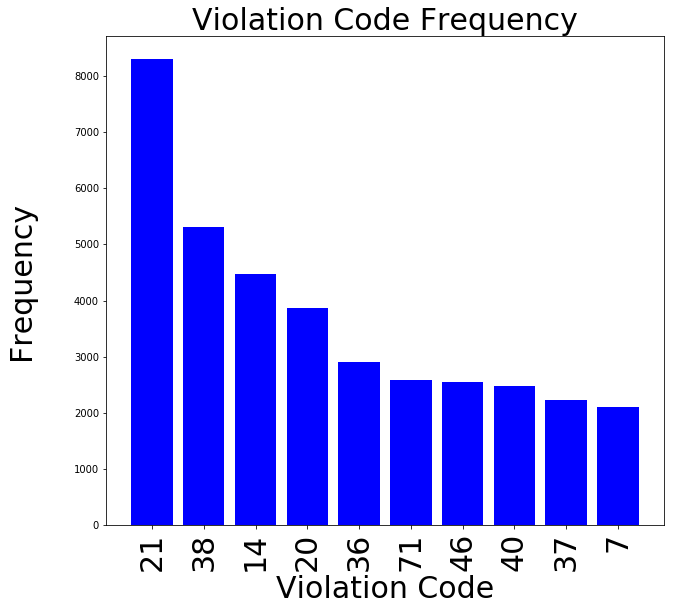

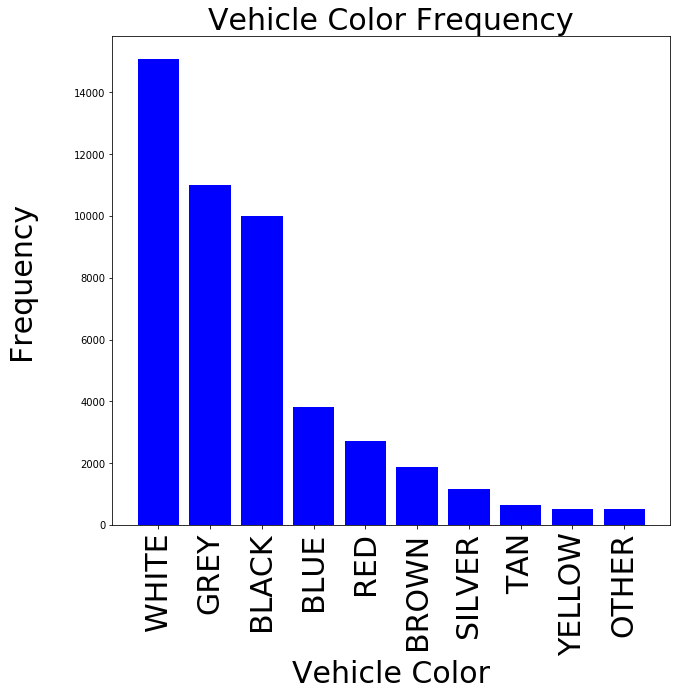

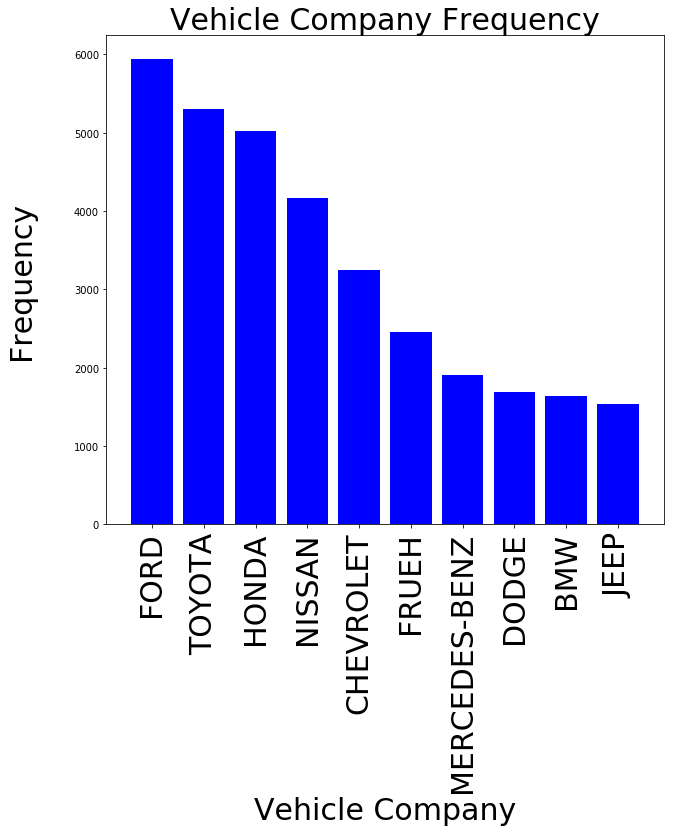

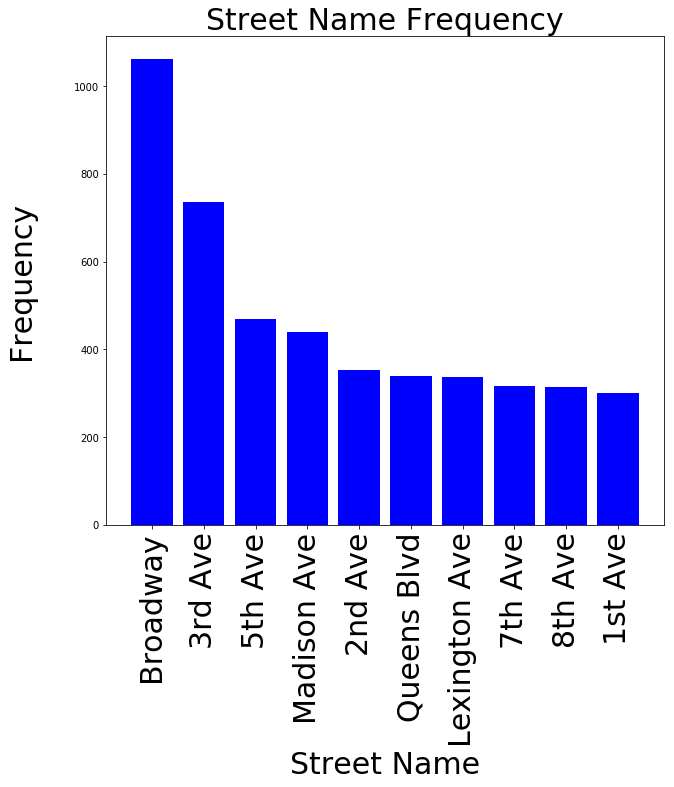

In [6]:
def map_reduce (lists):
    rdd = sc.parallelize(lists)
    rdd_count = rdd.map(makeKeyValue)
    rdd_sum = rdd_count.reduceByKey(addValues)
    rdd_counts_sorted = sorted (rdd_sum.collect(), key = lambda x: x[1], reverse = True)
    return rdd_counts_sorted

#plotting the frequencies
def plot_bar (rdd_counts_sorted,c,x_label,y_label, title,tag ):
    x, y = zip(*rdd_counts_sorted[:10])
    fig, axs = plt.subplots(1,1,figsize=(10,9))
    index = np.arange(len(x))
    plt.bar(index, y, color =c)
    plt.ylabel(y_label, fontsize=30)
    plt.xlabel(x_label, fontsize=30)
    plt.xticks(index, x, fontsize=30, rotation = 90)
    plt.title(title,size = 30)
    plt.savefig('plt_'+str(tag)+'.png', dpi = 300)
    plt.show() 

ls = map_reduce (make_dataframe(data)[2])
plot_bar (ls,'b', "Violation Code","Frequency\n", "Violation Code Frequency",'code')

ls = map_reduce (make_dataframe(data)[7])
plot_bar (ls,'b', "Vehicle Color","Frequency\n", "Vehicle Color Frequency",'color')

ls = map_reduce (make_dataframe(data)[4])
plot_bar (ls,'b', "Vehicle Company","Frequency\n", "Vehicle Company Frequency",'comp')

ls = map_reduce (make_dataframe(data)[6])
plot_bar (ls,'b', "Street Name","Frequency\n", "Street Name Frequency",'str')


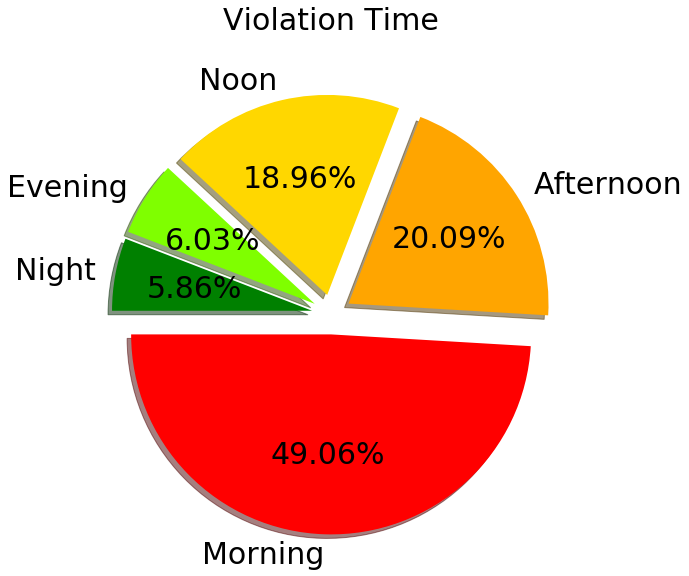

<Figure size 432x288 with 0 Axes>

In [7]:
"""""""""""""""""""""""""""""""""""""""""""pie chart for violation time"""""""""""""""""""""""""""""""""""""""""""

def plot_pie (rdd_counts_sorted,title):
    x, y = zip(*rdd_counts_sorted[:20])
    fig, ax = plt.subplots(figsize=(10, 9), subplot_kw=dict(aspect="equal"))
    plt.rcParams ['font.size'] = 30
    explode = (0.1, 0.1, 0.1, 0.1,0.1)
    colors = ['red', 'orange', 'gold','chartreuse', 'green',]
    plt.pie(y, labels=x, explode=explode, colors=colors,
            autopct='%1.2f%%', shadow=True, startangle=180)
    plt.title(title, size = 30)
    plt.axis('equal')
    plt.savefig(title+'.png', dpi = 300)
    plt.show()
    plt.clf()

ls1 = map_reduce (make_dataframe(data)[9])
plot_pie (ls1, "Violation Time\n" )

In [8]:
"""""""""""""""""""""""""""""""""""""make dataframe with street and time"""""""""""""""""""""""""""""""""""""
def street_time_dataframe(data1, data2):
    street_time = [[b_,a_] for a_, b_ in zip(data1,data2)]
    m = []
    n = []
    a = []
    e = []
    ni = []
    for s in street_time:
        if (s[0] == 'Morning'):
            m.append(s[1])
        elif (s[0] == 'Noon'):
            n.append(s[1])
        elif (s[0] == 'Afternoon'):
            a.append(s[1])
        elif (s[0] == 'Evening'):
            e.append(s[1])
        elif (s[0] == 'Night'):
            ni.append(s[1])
    dayT = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night']
#     print (dayT)
    d = [m,n,a,e,ni]
#     print(d)
    df = DataFrame (d)
    df = df.transpose()
    df.columns = dayT
    data = df.values.T.tolist()
    return data

ls = street_time_dataframe(make_dataframe(data)[6],make_dataframe(data)[9])


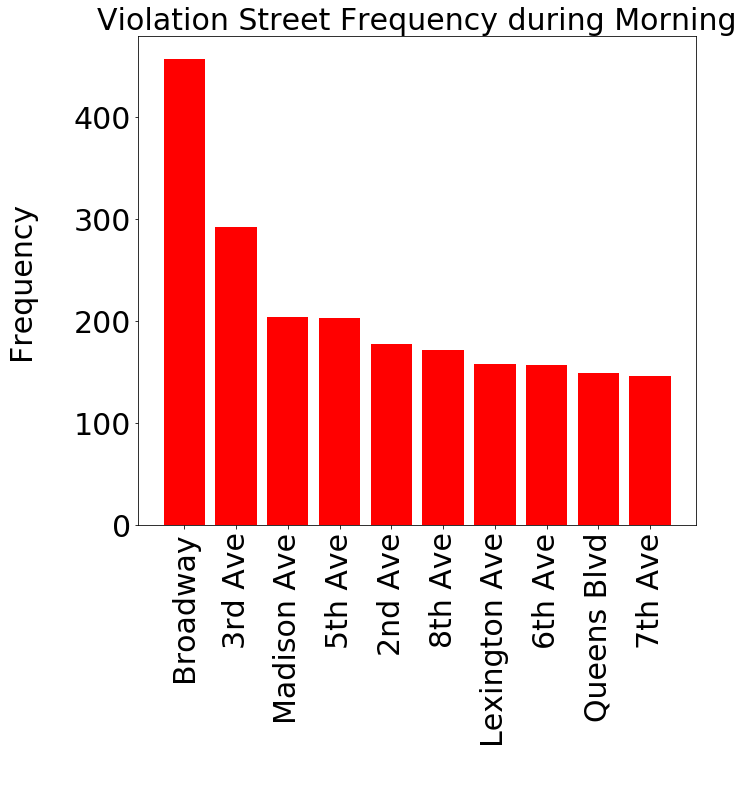

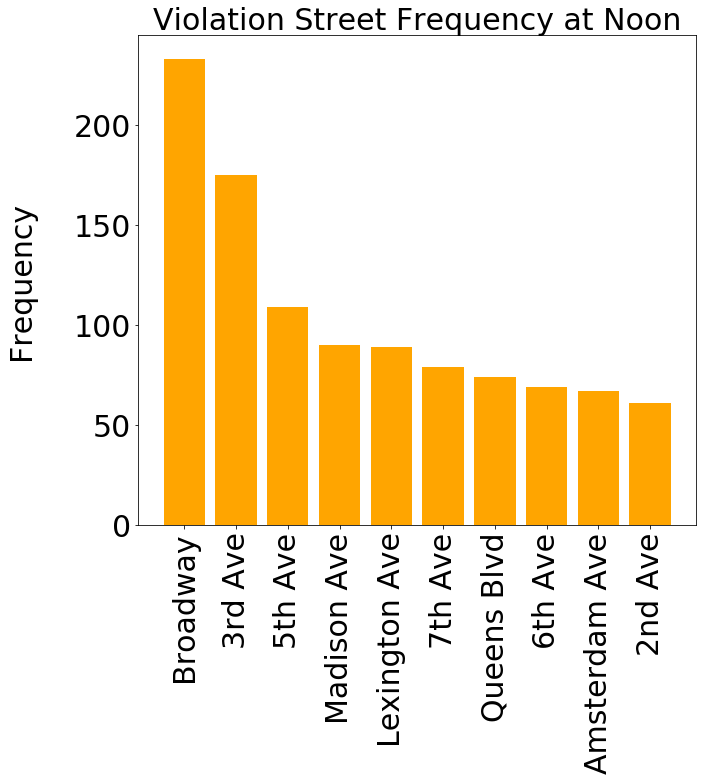

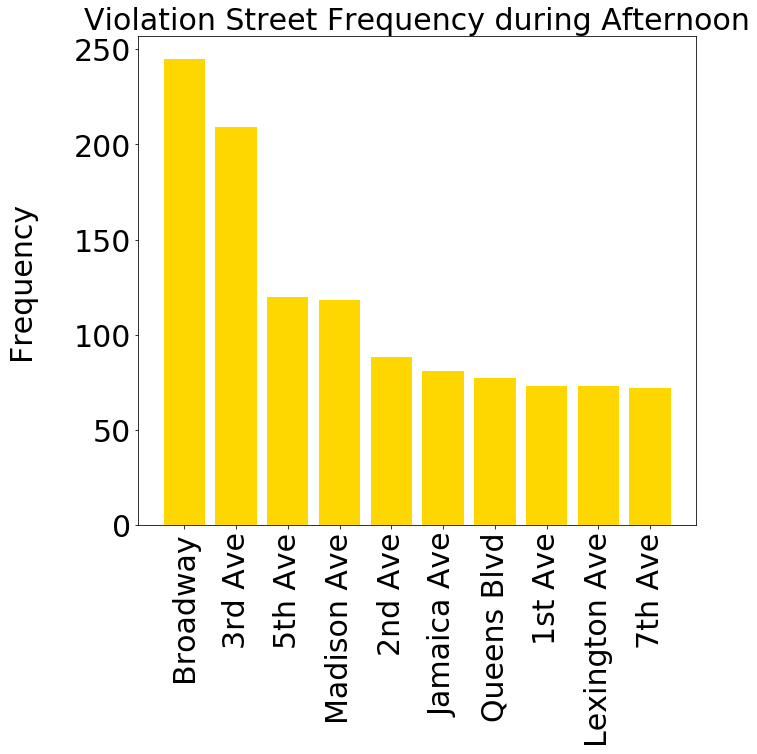

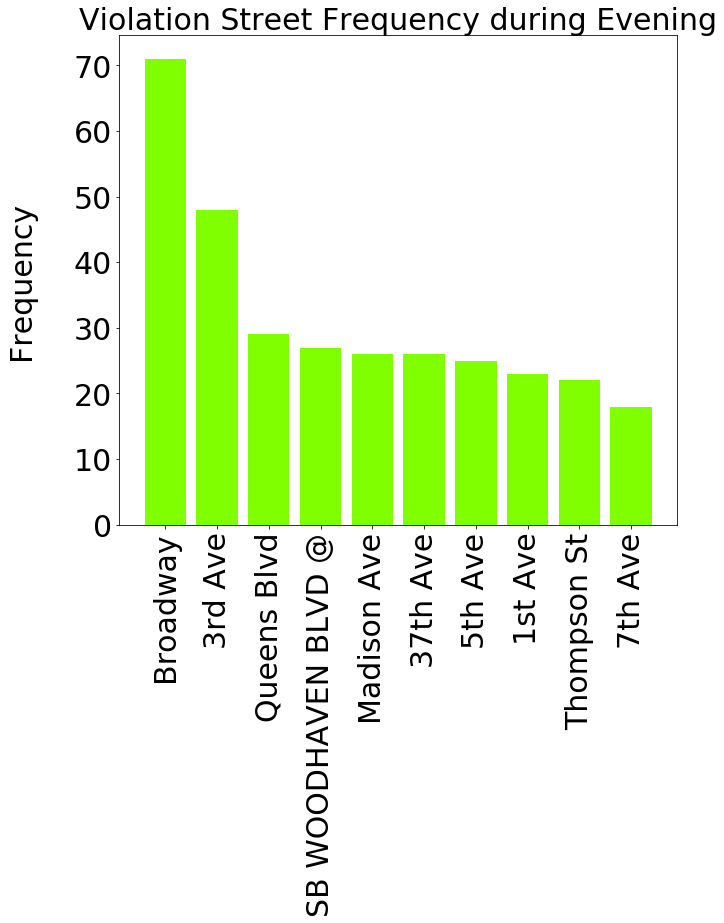

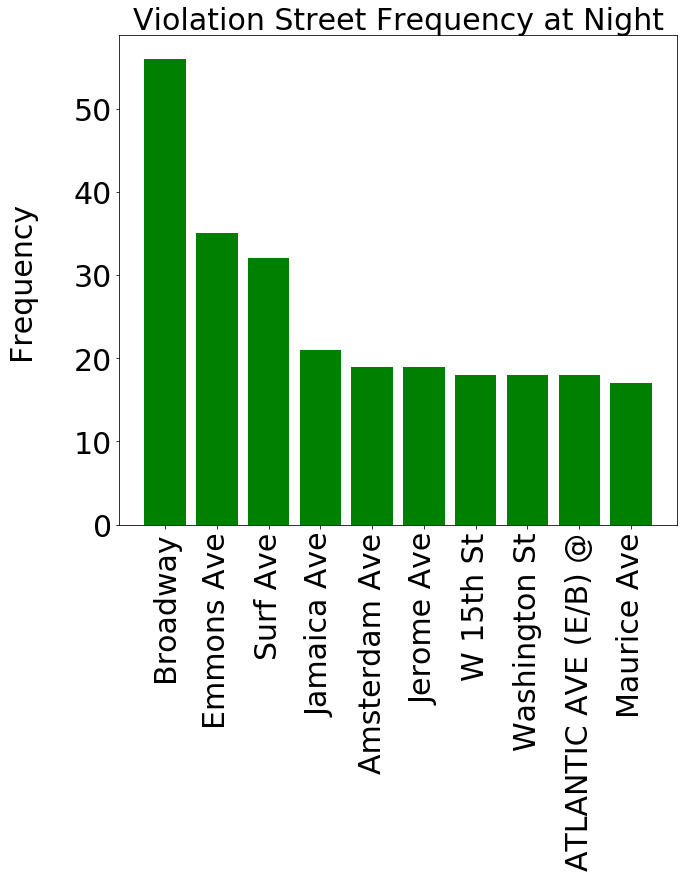

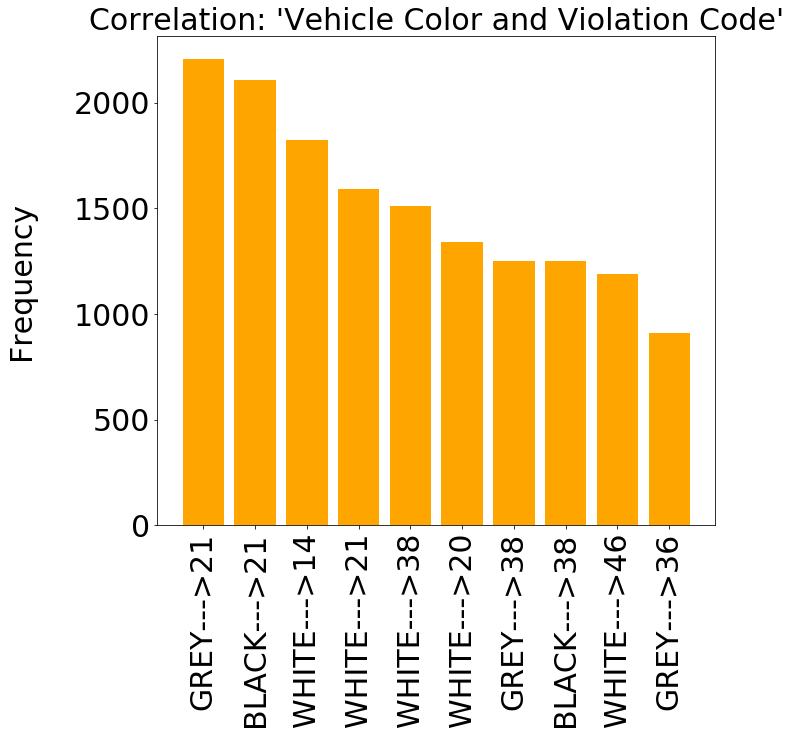

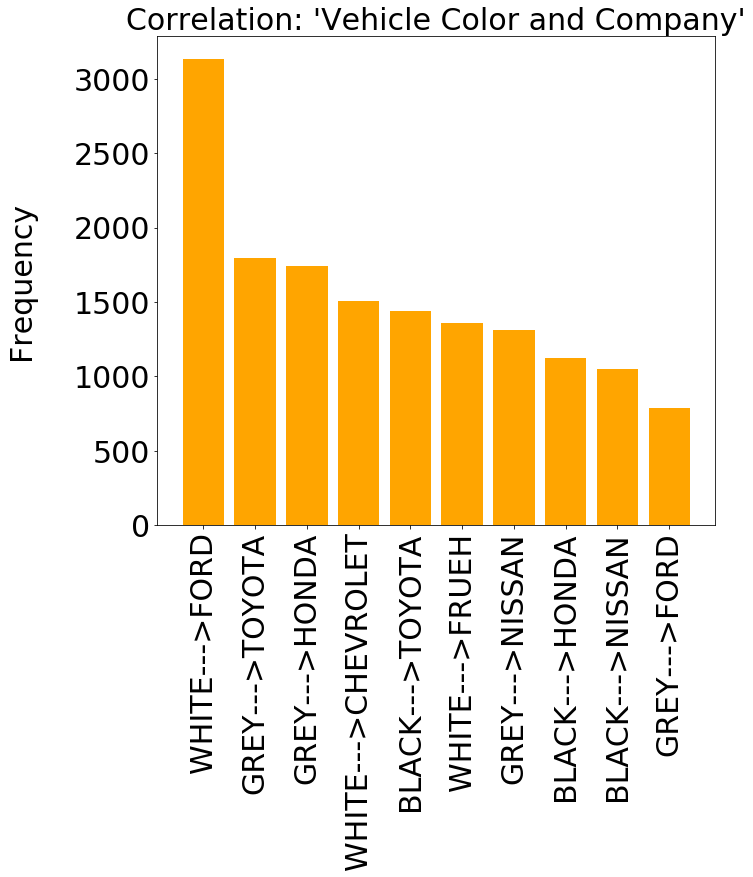

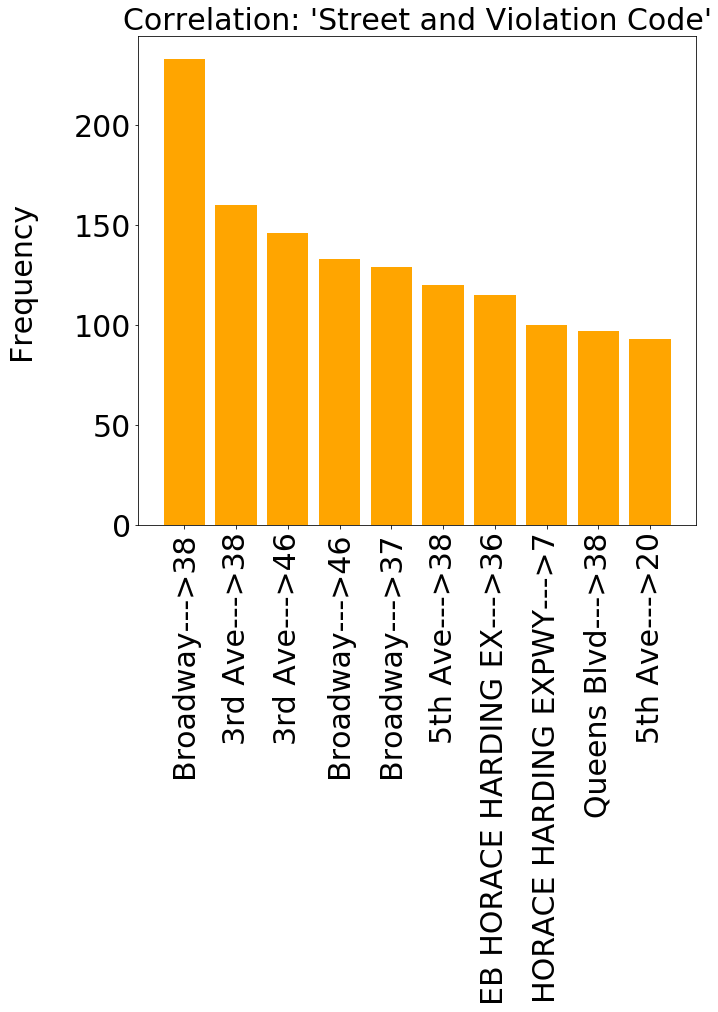

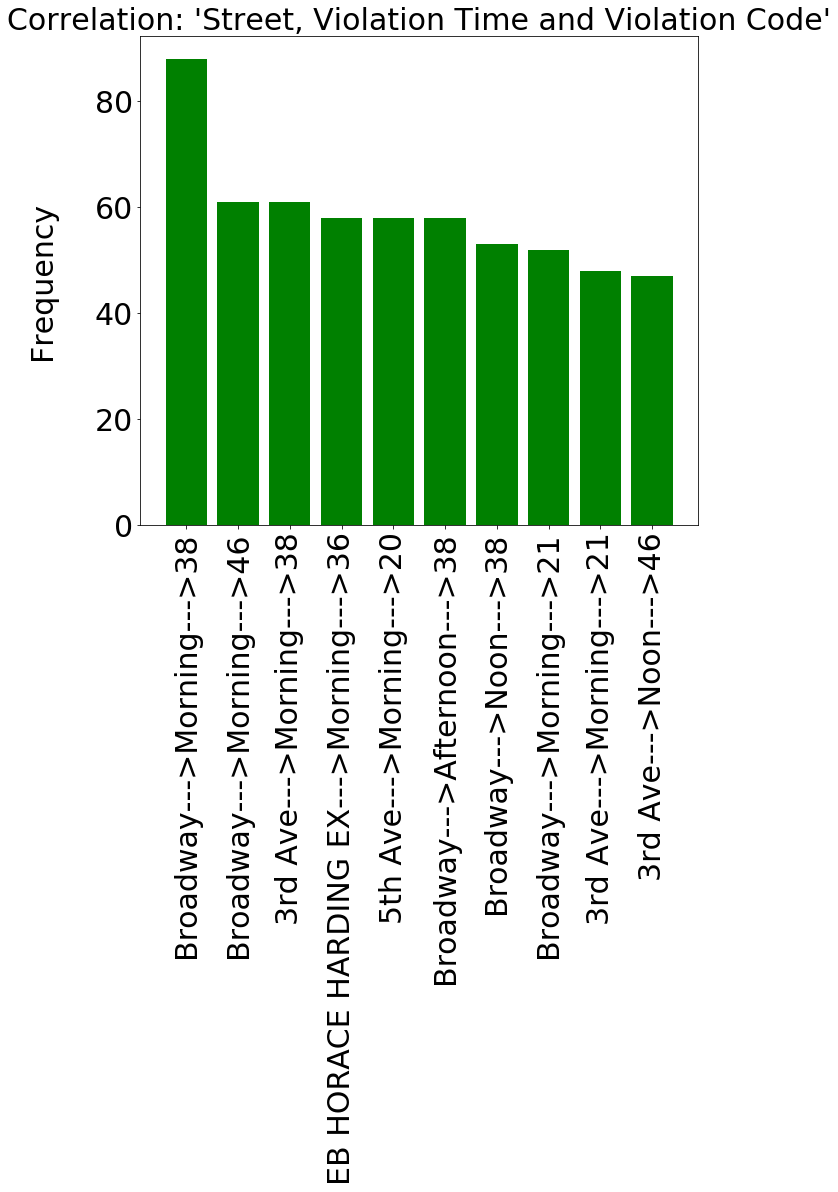

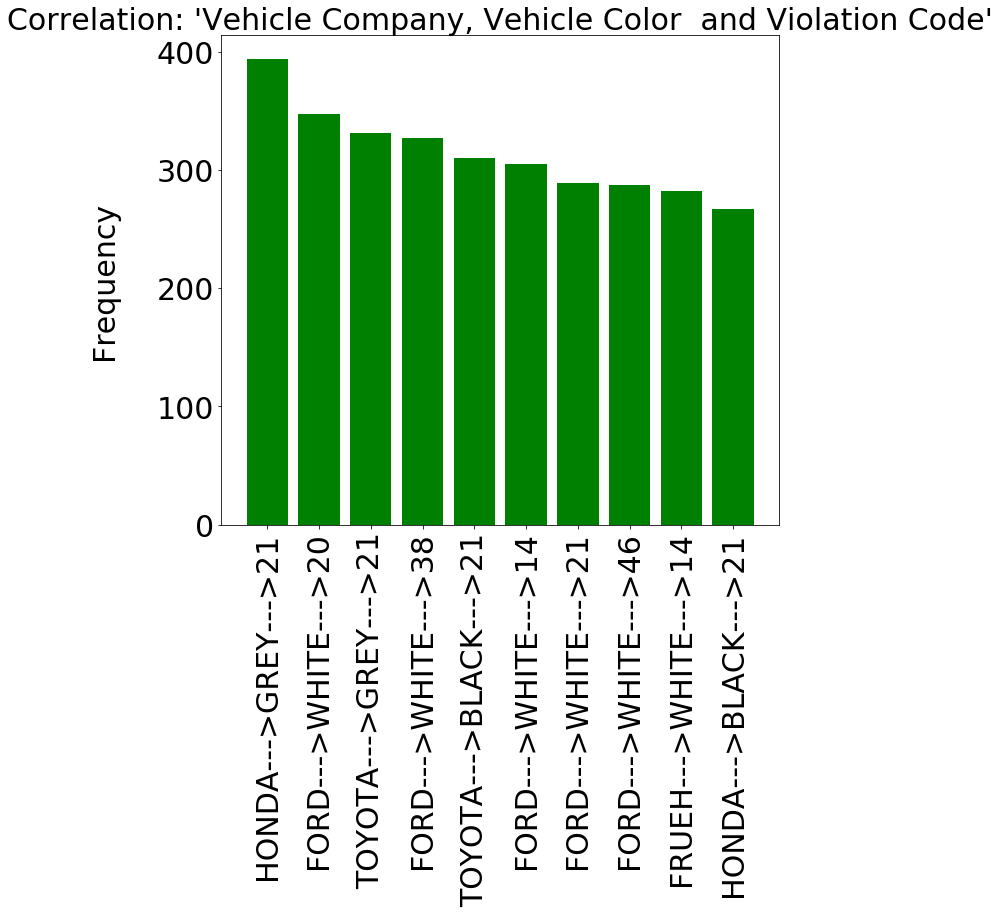

In [9]:
ls1 = map_reduce (ls[0])
plot_bar (ls1,'red', " ","Frequency\n", "Violation Street Frequency during Morning",'morning')

filtered = filter(partial(is_not, None), ls [1])
ls2 = map_reduce (filtered)
plot_bar (ls2,'orange',"", "Frequency\n", "Violation Street Frequency at Noon",'noon')

filtered1 = filter(partial(is_not, None), ls [2])
ls3 = map_reduce (filtered1)
plot_bar (ls3,'gold',"", "Frequency\n", "Violation Street Frequency during Afternoon",'aftnoon')

filtered2 = filter(partial(is_not, None), ls [3])
ls4 = map_reduce (filtered2)
plot_bar (ls4,'chartreuse',"", "Frequency\n", "Violation Street Frequency during Evening",'eve')

filtered3 = filter(partial(is_not, None), ls [4])
ls5 = map_reduce (filtered3)
plot_bar (ls5,'green',"", "Frequency\n", "Violation Street Frequency at Night",'night')

pair = make_pair (lists[2],lists[7])
mr = map_reduce (pair)
plot_bar (mr,'orange', "","Frequency\n", "Correlation: 'Vehicle Color and Violation Code'",'color_code')

pair1 = make_pair (lists[4],lists[7])
mr1 = map_reduce (pair1)
plot_bar (mr1,'orange',"","Frequency\n", "Correlation: 'Vehicle Color and Company'",'color_company')

pair2 = make_pair (lists[2],lists[6])
mr2 = map_reduce (pair2)
plot_bar (mr2,'orange',"","Frequency\n", "Correlation: 'Street and Violation Code'",'color_code')

trio = make_trio (lists[2],lists[9],lists[6])
mr3 = map_reduce (trio)
plot_bar (mr3,'green',"", "Frequency\n","Correlation: 'Street, Violation Time and Violation Code'",'street_plate_code')

trio1 = make_trio (lists[2],lists[7],lists[4])
mr4 = map_reduce (trio1)
plot_bar (mr4,'green',"", "Frequency\n", "Correlation: 'Vehicle Company, Vehicle Color  and Violation Code'",'street_plate_code')


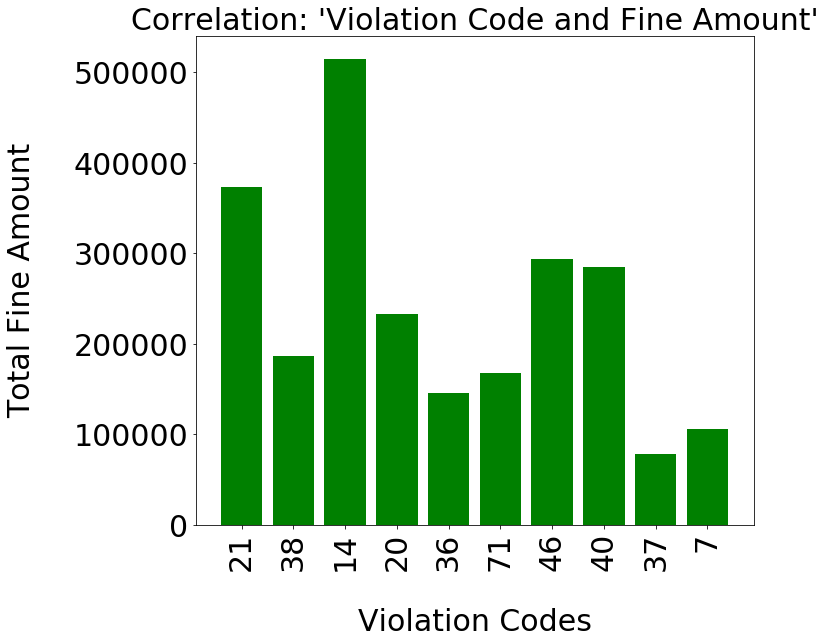

In [11]:
pair6 = make_pair (lists[8],lists[2])
mr6 = map_reduce (pair6)
x = []
for i in range(0, len(mr6)):
    if(mr6[i][0].split('--->')[1] == "vary" or mr6[i][1] == "vary" or 
       mr6[i][0].split('--->')[1] == "nan" or mr6[i][1] == "nan"):
       val = 0
    else:
        val = int(mr6[i][0].split('--->')[1]) * int(mr6[i][1])
    x.append((mr6[i][0].split('--->')[0],val))
#     x = sorted(x, key = lambda x:x[1], reverse=True)

plot_bar (x,'green',"\nViolation Codes", "Total Fine Amount\n", "Correlation: 'Violation Code and Fine Amount'",'color_code')
